In [1]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.sparse.linalg import eigsh
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('axes',edgecolor='white')

In [3]:
N=[24,30,36,42,48,54,60]
spectrum_trion=[]
spectrum_exciton=[]
omega_trion=[]
omega_exciton=[]
for n in N:
    Exciton=ExcitonMoS2(epsilon=2.5,N=n,vb=[6],cb=[7],spin_orbit=False,cutoff=0.6,shift=0.7)
    Exciton.constructTrionBasis()
    Exciton.constructTrionHamiltonian()
    Exciton.constuctExcitonHamiltonian()
    Exciton.calculateAbsobtionSpectrumTrion(eta=0.0001,omega_min=2.0,omega_max=2.4)
    Exciton.calculateAbsobtionSpectrum(eta=0.0001,omega_min=2.0,omega_max=2.4)
    
    spectrum_trion.append(-Exciton.trion_eps.imag)
    spectrum_exciton.append(-Exciton.eps.imag)
    
    omega_trion.append(Exciton.trion_omega.real-Exciton.trion_spectrum_shift)
    omega_exciton.append(Exciton.omega)
    
    print(n)

24
30
36
42
48
54
60


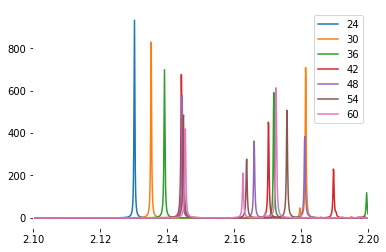

In [4]:
for i in range(len(N)):
    plt.plot(omega_trion[i],spectrum_trion[i],label=N[i])
plt.xlim([2.1,2.2])
plt.legend()

/home/drg/.local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


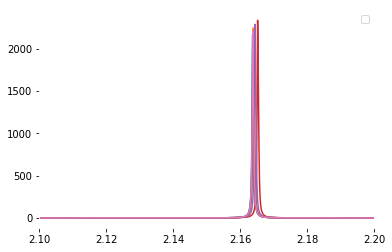

In [5]:
for i in range(len(N)):
    plt.plot(omega_exciton[i],spectrum_exciton[i])
plt.xlim([2.1,2.2])
plt.legend()

In [28]:
trion_peaks=[]
exciton_peak=[]
trion_strenght=[]
exciton_strenght=[]
for i in range(len(N)):
    
    peak,prop=find_peaks(spectrum_trion[i],height=10)
    trion_peaks.append(omega_trion[i][peak[:2]])
    trion_strenght.append(prop['peak_heights'][:2])
    
    peak,prop=find_peaks(spectrum_exciton[i],height=10)
    exciton_peak.append(omega_exciton[i][peak[:2]])
    exciton_strenght.append(prop['peak_heights'][:2])
    
trion_peaks=np.array(trion_peaks)
exciton_peak=np.array(exciton_peak)
trion_strenght=np.array(trion_strenght)
exciton_strenght=np.array(exciton_strenght)

In [29]:
exciton_peak

array([[2.16364727+0.0001j, 2.34873025+0.0001j],
       [2.16388722+0.0001j, 2.35632873+0.0001j],
       [2.16372725+0.0001j, 2.36240752+0.0001j],
       [2.16516697+0.0001j, 2.36704659+0.0001j],
       [2.16436713+0.0001j, 2.36880624+0.0001j],
       [2.16388722+0.0001j, 2.36928614+0.0001j],
       [2.16372725+0.0001j, 2.36944611+0.0001j]])

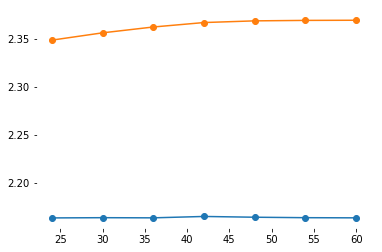

In [30]:
plt.plot(N,exciton_peak[:,0],'-o')
plt.plot(N,exciton_peak[:,1],'-o')

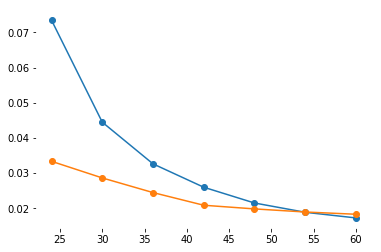

In [46]:
plt.plot(N,trion_peaks[:,1]-trion_peaks[:,0],'-o')
plt.plot(N,exciton_peak[:,0]-trion_peaks[:,0],'-o')

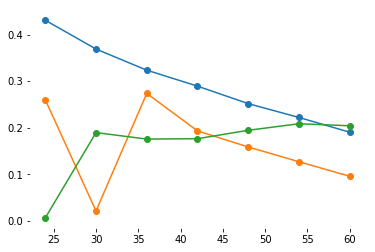

In [40]:
plt.plot(N,trion_strenght[:,0]/exciton_strenght[:,0],'-o')
plt.plot(N,trion_strenght[:,1]/exciton_strenght[:,0],'-o')
plt.plot(N,exciton_strenght[:,1]/exciton_strenght[:,0],'-o')